In [4]:
# 1.Detect lines and circles 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [70]:
img = cv2.imread("./images/Lines.jpg", cv2.IMREAD_GRAYSCALE)

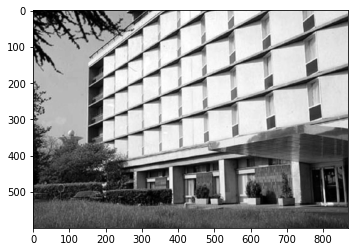

In [71]:
plt.imshow(img, cmap=plt.cm.gray)


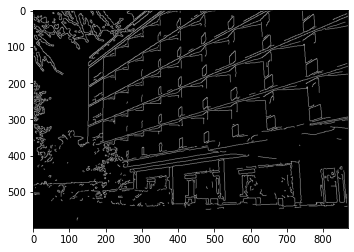

In [72]:
img = cv2.GaussianBlur(img, (3, 3), 1)
edges = cv2.Canny(img, 150, 200)
plt.imshow(edges, cmap=plt.cm.gray)

In [73]:
def hough_line(img ):

    #1.finite number of possible values of Rho and Theta 
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    distance= int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-distance, distance, distance * 2)

    cos= np.cos(thetas)
    sin= np.sin(thetas)
    num_angles = len(thetas)

    #2. 2D array (accumulator) for the Hough Space of n_rhos(2*d) and n_thetas(180).
    accumulator = np.zeros((2 * distance, num_angles), dtype=np.uint8)
   
    y_idxs, x_idxs = np.nonzero(img)

    # loop through all possible angles, calculate rho , find theta and rho index , and increment the accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for idx in range(num_angles):

            rho = distance + int(round(x * cos[idx] + y * sin[idx]))
            accumulator[rho, idx] += 1

    return accumulator, thetas, rhos


def show_hough_line(img, accumulator, thetas, rhos):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(accumulator, cmap='jet',extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    plt.show()


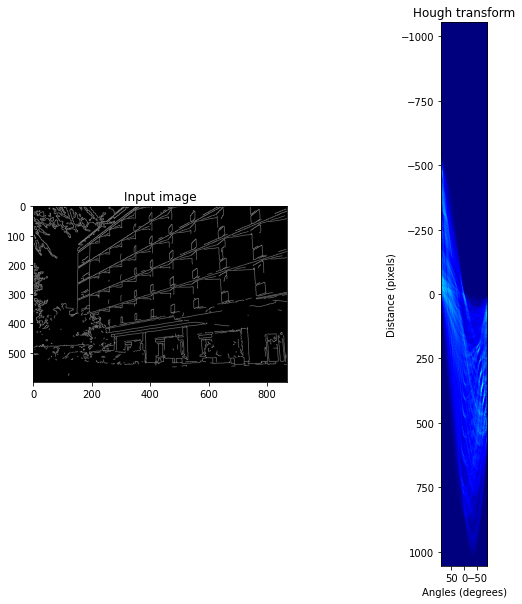

In [74]:
accumulator, thetas, rhos = hough_line(edges)
show_hough_line(edges, accumulator, thetas, rhos)

In [75]:
def Lines_only( accumulator , angles , threshold ) :
    lines = []
    for angle_index in range(accumulator.shape[0]) :
        for rho_idx in range(accumulator.shape[1]) :
            if accumulator[angle_index , rho_idx] > threshold :
                angle = angles[angle_index]
                lines.append((angle , rho))
    return lines
lines = Lines_only(accumulator ,thetas , 600)

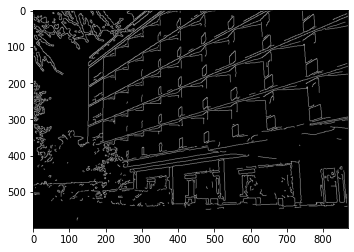

In [76]:
def plot_lines(image, lines):
    
    size = len(lines)
    for i in range(size):
        rho = lines[i][1]
        theta = lines[i][0] 
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            
        cv2.line(image, pt1, pt2, (255,255,0), 2)
        
    plt.imshow(image, cmap=plt.cm.gray)
    
plot_lines(edges, lines)

In [8]:
#Detecting Circles

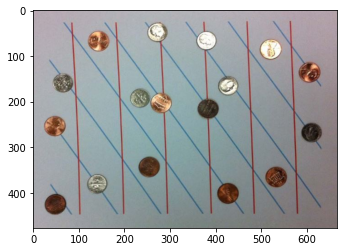

In [7]:
from PIL import Image
from libs import Hough

input_img =  np.array(Image.open('./images/hough.jpg')).astype(np.uint8)
plt.imshow(input_img)


Detecting Hough Circles Started!
54.800000000000004 178.1
Number of coins detected:  17
Detecting Hough Circles Complete!


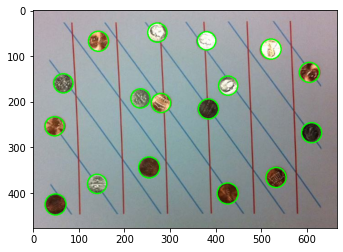

In [9]:
print ("Detecting Hough Circles Started!")
DetectedCircles=Hough.HoughCircles(input_img,rMin=20,rMax=40,binTh=20,accTh=170)
print ("Detecting Hough Circles Complete!")
plt.imshow(DetectedCircles)



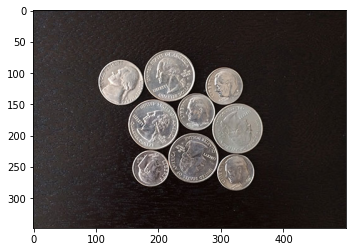

In [10]:
input_img =  np.array(Image.open('./images/circle_sample1.jpg')).astype(np.uint8)
plt.imshow(input_img)

37.2 120.9
Number of coins detected:  9


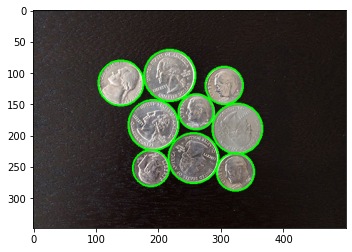

In [17]:
DetectedCircles=Hough.HoughCircles(input_img,rMin=20,rMax=50,binTh=20,accTh=200)
plt.imshow(DetectedCircles)